## Fine-tune a pre-trained model

### Import libraries

In [1]:
from arcgis.gis import GIS
from arcgis.learn import prepare_data, MaskRCNN

2025-02-14 17:23:51.678926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
gis = GIS("home")

### Prepare the image chips for training

When you are using or fine-tuning a model, you must ensure that your image chips are exported in the same way. For this case, my original image chips were 4-band. [The model expects 3-bands](https://doc.arcgis.com/en/pretrained-models/latest/imagery/using-building-footprint-extraction-usa.htm#:~:text=Bands%E2%80%94Three%20bands%20(for%20example%2C%20red%2C%20green%2C%20and%20blue). I had to use the [Extract Bands raster function](https://pro.arcgis.com/en/pro-app/latest/help/analysis/raster-functions/extract-bands-function.htm) on the original image, extract 3 bands, and then export the image chips.

If your image chips do not satisfy the pre-trained model's requirements, it will fail at `model.fit()` or `model.from_model()`.

In [3]:
dataPath = r'/arcgis/home/Fine tune Building Detection model/DLTrainingSamples_3Band_512Size'

In [4]:
data = prepare_data(dataPath, batch_size=16, chip_size=112, class_mapping={'1': 'Building'})

### Fine-tune the pre-trained MaskRCNN model from the Living Atlas

With the ArcGIS API for Python you can downloaded the deep learning package from the ArcGIS Living Atlas of the world into the `arcgis` directory.

In [5]:
dlpk = r'/arcgis/home/Fine tune Building Detection model/usa_building_footprints.dlpk'

Rather than using `MaskRCNN(data, backbone='resnet-50')`, `MaskRCNN.from_model()` let's you continue training, or fine-tune, a deep learning model.
From the [help documentation](https://developers.arcgis.com/python/latest/api-reference/arcgis.learn.toc.html#arcgis.learn.MaskRCNN.from_model)
> Creates a `MaskRCNN` Instance segmentation object from an Esri Model Definition (EMD) file.

In [6]:
model = MaskRCNN.from_model(dlpk, data)

Setting the `chip_size` of input data (112) to same as input model's (512).


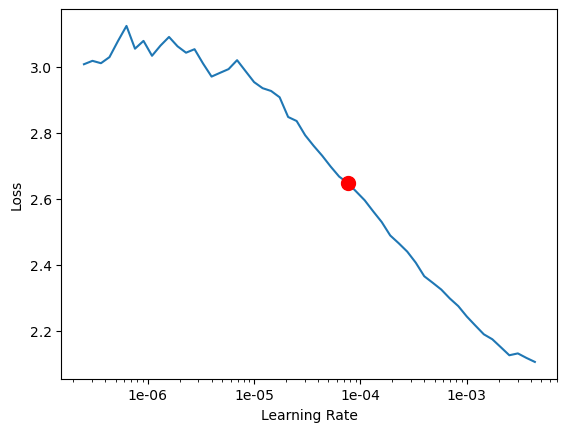

7.585775750291836e-05

In [7]:
lr = model.lr_find()
lr.real

In [8]:
model.fit(epochs=20, lr=lr.real)

epoch,train_loss,valid_loss,average_precision,time
0,2.345557,2.127877,0.184502,00:45
1,1.879828,1.742311,0.503254,00:45
2,1.546811,1.294279,0.684174,00:44
3,1.309782,1.184627,0.726052,00:43
4,1.158232,1.237744,0.798219,00:44
5,1.037624,1.175647,0.825281,00:44
6,0.969184,1.092757,0.829932,00:44
7,0.922915,1.044666,0.846658,00:44
8,0.875463,1.006705,0.864744,00:44
9,0.840937,1.022774,0.847874,00:44


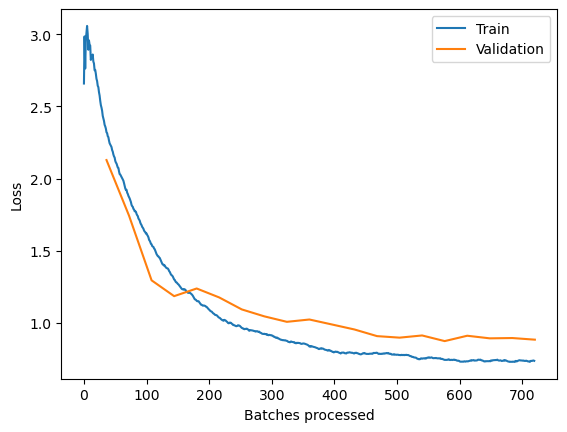

In [9]:
model.plot_losses()

In [10]:
model.average_precision_score()

{'Building': 0.8473528903704486}